## Neural Network

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

### Crear Datasets

In [2]:
n = 500 #numero de registros
p = 2 #numero de variables

# factor muestra que tan alejados estan un circulo del otro
# noise indica el ruido que se esta agregado a nuestros datos
x, y = make_circles(n_samples=n,factor=0.5, noise = 0.05) 

print(x)

[[-0.3010784  -0.36984982]
 [ 0.3144972   0.45584501]
 [-1.03252735  0.02937564]
 [-0.45522981  0.31287528]
 [ 0.91372633  0.49960896]
 [-0.30172331 -0.41810884]
 [ 0.09403591  0.57566235]
 [ 0.58118758  0.11174357]
 [-0.05806857  0.99372478]
 [-0.14137463  1.03919145]
 [-0.00305982 -0.42279565]
 [-0.2085026   0.47312974]
 [-0.14989128 -1.06017385]
 [ 0.47948875  0.87627824]
 [-0.31783251  0.87314608]
 [-0.23121711  0.48204117]
 [-0.3073688   0.87902148]
 [-0.46771135 -0.23253153]
 [ 0.43831234  0.17394386]
 [-0.02171169  1.04103633]
 [ 0.45394559 -0.39788287]
 [-0.35312525 -0.40344986]
 [ 0.14126741  0.45705007]
 [-0.96135178 -0.06608524]
 [-0.8272753   0.65775165]
 [-0.41595475 -0.89335908]
 [ 0.16003193  0.38622942]
 [ 0.47200547  0.34924048]
 [ 0.44089366 -0.07294495]
 [-0.36799855 -0.92262278]
 [ 0.41348324  0.90667435]
 [-0.05487681 -0.49608047]
 [-0.77932459 -0.66851995]
 [-0.51289293 -0.1871881 ]
 [-0.94548049  0.20765949]
 [-0.70590647  0.76224697]
 [-0.58131002 -0.77378502]
 

In [3]:
print(y)

[1 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0
 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0
 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1
 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1
 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0
 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1
 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0
 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1
 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1
 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 1
 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1
 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1
 0 1 1 0 0 0 0 1 1 1 1 0 

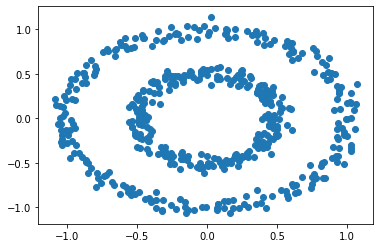

In [4]:
plt.scatter(x[:,0],x[:,1])
plt.show()

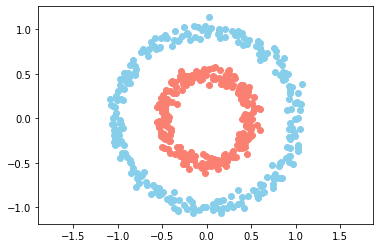

In [5]:
# Mostrar solo si y = 0
plt.scatter(x[y == 0,0],x[y == 0,1], c = "skyblue")
# Mostrar solo si y = 1
plt.scatter(x[y == 1,0],x[y == 1,1], c = "salmon")
plt.axis("equal") #visualiza los ejes con la misma proporción
plt.show()

### Crear Clase de la Capa de la Red

In [6]:
class neural_layer():
    #n_conn:numero de conexiones que entran en nuestra capa de la capa anterior
    #n_neur: numero de neuronas en la capa
    #act_f:funcion de activacion para las neuronas de esta capa
    def __init__(self, n_conn, n_neur, act_f):
        self.act_f = act_f
        self.b = np.random(1, n_neur) * 2 - 1
        self.w = np.random(n_conn, n_neur) * 2 - 1

### Funciones de Activación

In [7]:
# Funcion anonima (lambda x)
sign = (lambda x: 1 / (1 + np.e ** (-x)), #Función Sigmoide
        lambda x: x * (1 - x)) #Derivada de la Funcion Sigmoide
relu = lambda x: np.maximum(0,x)

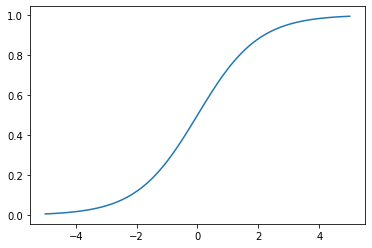

In [8]:
_x = np.linspace(-5,5,100)
#Función Sigmoide
plt.plot(_x,sign[0](_x))

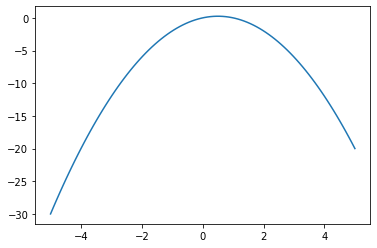

In [9]:
#Derivada de la función Sigmoide
plt.plot(_x,sign[1](_x))

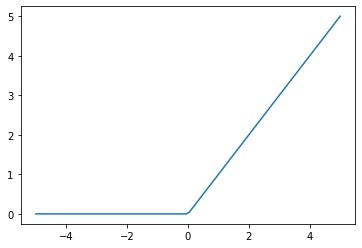

In [10]:
#Función Relu
plt.plot(_x,relu(_x))

### Creación de la Red Neuronal

In [11]:
#Esta una manera valida de crear capas pero no es iterativa
l0 = neural_layer(p, 4, sign)
l1 = neural_layer(4, 8, sign)
# ...

TypeError: 'module' object is not callable